In [1]:
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
attributes = [
    "anxiety",
    "peer pressure",
    "yellow fingers",
    "smoking",
    "genetics",
    "allergy",
    "lung cancer",
    "attention disorder",
    "coughing",
    "fatigue",
    "car accident"
]   

In [3]:
causalgraph = nx.DiGraph()
causalgraph.add_weighted_edges_from([
    (1, 4, 0.4),
    (2, 4, 0.6),
    (4, 3, 1),
    (4, 7, 0.6),
    (5, 7, 0.4),
    (5, 8, 1),
    (6, 9, 0.7),
    (7, 9, 0.3),
    (7, 10, 0.6),
    (8, 11, 0.2),
    (9, 10, 0.4),
    (10, 11, 0.8)
])

In [4]:
def func(data, preds):
    val = 0
    for edge in preds:
        val += data[edge[0]-1] * edge[2]["weight"]
    return val + np.random.normal()*0.05

def generate_data(N, causalgraph):
    topsort = list(nx.topological_sort(causalgraph))
    data = np.zeros((N, 11))
    for i in range(N):
        for j in topsort:
            preds = list(causalgraph.in_edges(j, data=True))
            if len(preds) == 0:
                data[i][j-1] = np.random.normal()
            else:
                data[i][j-1] = func(data[i], preds)
    return data

In [5]:
data = generate_data(5000, causalgraph)
df = pd.DataFrame(columns=attributes, data=data)
df

[1, 2, 5, 6, 4, 8, 3, 7, 9, 10, 11]


,anxiety,peer pressure,yellow fingers,smoking,genetics,allergy,lung cancer,attention disorder,coughing,fatigue,car accident
0,-0.997026,0.305949,-0.245369,-0.188540,-0.594928,0.290058,-0.310845,-0.520612,0.067354,-0.216980,-0.286787
1,0.298403,0.557019,0.585846,0.548505,0.305360,0.712008,0.357174,0.345176,0.552666,0.469066,0.467988
2,1.033888,-0.507451,-0.120863,0.002148,0.397072,-1.364940,0.227123,0.426428,-0.788770,-0.142641,-0.031966
3,-1.794003,0.961380,-0.168340,-0.135208,0.689891,-1.604938,0.246588,0.720702,-1.079444,-0.252613,-0.081759
4,0.480734,-0.188698,0.150005,0.134739,0.422285,-0.028183,0.154742,0.377239,0.130866,0.151431,0.120382
...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.438449,-1.355746,-1.033133,-1.027487,0.098557,0.068124,-0.580034,0.067105,-0.212639,-0.468282,-0.486515
4996,-1.564790,-0.115926,-0.812945,-0.759045,-0.676708,0.910911,-0.721918,-0.682957,0.478801,-0.157697,-0.181106
4997,-0.039260,-0.149506,-0.132280,-0.122077,-0.300859,0.849755,-0.101435,-0.231320,0.520034,0.145755,0.079153
4998,0.055941,-0.834075,-0.405688,-0.389509,1.256478,0.040470,0.329661,1.216022,0.126903,0.253752,0.460164


In [6]:
# from causality.inference.search import IC
# from causality.inference.independence_tests import RobustRegressionTest

# variable_types = {}
# for a in attributes:
#     variable_types[a] = 'c'

# ic_algorithm = IC(MutualInformationTest)
# graph = ic_algorithm.search(df, variable_types)

In [ ]:
# for e in graph.edges(data=True):
#     print(e)

In [ ]:
# nx.draw_shell(graph, with_labels=True)

In [9]:
data.shape

(5000, 11)

[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0 

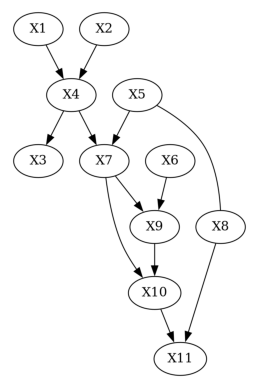

In [10]:
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

res = ges(data)
pyd = GraphUtils.to_pydot(res['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()